**Exploritory Data Analysis of Hospital Readmissions and Home Health Care Part II**
***
After my initial EDA and story telling review, I wanted to see if more observations may significantly alter my initial findings.<br>
As such, the data was recleaned to contain all observations for hospital readmissions and home health care agency ratings.<br>
These two dataframes will be pulled in and explored to see what matches my initial findings, and what does not. 

In [2]:
# Importing All the Essential Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Making My Plots Pretty
sns.set()

In [4]:
# Adding Scatterplot Program from Part 1
def scatterme(x,y):
    """This function will take in two dataframe columns you want to create a scatter plot for and create a scatter plot
    with a line of best fit.  The function will also compute the pearson correlation coefficient and add it to the chart"""
    
    # Initializing Text Axes
    f=plt.figure()
    ax = f.add_subplot(111)
    
    # Plots Initial Scatter Plot
    _ = plt.scatter(x,y,color='green')
    
    # Finds Line of Best Fit and Overlays It
    a,b=np.polyfit(x,y,1)
    x2 = np.array([np.min(x),np.max(x)])
    y2 = a*x2+b
    _ = plt.plot(x2,y2, color = 'blue')
    plt.margins(.02)
    
    # Finds Pearson Correlation Coefficient and Adds it to the Graph
    core_mat = np.corrcoef(x,y)
    pcore = core_mat[0,1]
    text = 'p: %s\n'%(round(pcore,2))
    _ = plt.text(0.1, 0.9,text, ha='center', va='center', transform = ax.transAxes)
       

In [5]:
# Importing DataFrames for EDA
readmit = pd.read_csv('Readmissions_2.csv', index_col = 0)
hhc = pd.read_csv('HHC_Agencies_Cleaned.csv', index_col = 0)
readmit.head()

,hospital_name,provider_number,state,readmission_ratio,predicted_rate,expected_rate
1,CLAY COUNTY HOSPITAL,10073,AL,0.9853,14.4,14.6
2,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,10078,AL,1.4044,6.1,4.3
3,NORTHEAST ALABAMA REGIONAL MEDICAL CENTER,10078,AL,0.9653,16.7,17.3
4,ATHENS LIMESTONE HOSPITAL,10079,AL,1.0204,4.3,4.2
5,ATHENS LIMESTONE HOSPITAL,10079,AL,1.0616,17.0,16.0


In [5]:
hhc.head()

,state,cms_number,name,nursing_care,physical_therapy,occupational_therapy,pathology_services,medical_soc_services,home_health_aid,star_rating,...,move_buff,in_out_bed_buff,bathing_buff,move_pain_debuff,breathing_buff,oral_rx_buff,hospital_admit,urgent_noadmit,readmit_expectation,er_admit_expectation
0,AL,17009,ALACARE HOME HEALTH & HOSPICE,True,True,True,True,True,True,4.0,...,79.4,75.4,83.5,85.9,81.3,72.4,18.3,11.4,1,1
1,AL,17013,KINDRED AT HOME,True,True,True,False,False,True,4.0,...,77.6,71.4,80.3,83.6,79.3,59.9,15.5,15.1,2,1
2,AL,17014,AMEDISYS HOME HEALTH,True,True,True,True,True,True,4.0,...,81.3,72.8,82.1,78.0,85.7,68.5,18.9,12.1,2,2
3,AL,17016,SOUTHEAST ALABAMA HOMECARE,True,True,True,True,True,False,5.0,...,85.8,79.0,87.9,91.5,87.2,80.6,16.9,11.9,2,2
4,AL,17018,KINDRED AT HOME,True,True,True,True,True,True,4.0,...,82.8,73.9,85.2,80.8,85.0,66.0,22.2,10.2,1,2


***
Now that we've imported the data.  I would like to take a look at some histograms.<br>
In particular I would like to review the resubmission ratios and star ratings, similar to what was done in Part I.

In [6]:
# Compute Bins for Each Dataframe

r_data = len(readmit.state)
r_bins= int(np.sqrt(r_data))
hhc_data = len(hhc.state)
hhc_bins = int(np.sqrt(hhc_data))
print('Readmit Bins: ',r_bins,'\n')
print('HHC Bins: ',hhc_bins)


Readmit Bins:  120 

HHC Bins:  87


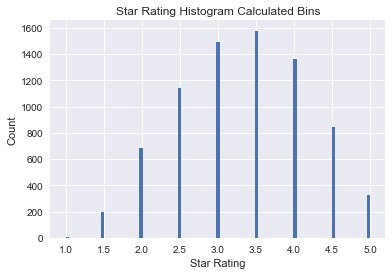

In [8]:
# Plotting Star Rating Histogram
_ = plt.hist(hhc.star_rating, bins=hhc_bins)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
_ = plt.title('Star Rating Histogram Calculated Bins')
plt.show()

Using the squre root rule, the bins appear to be separated apart.  I will try Matplotlib's default settings to contrast and compare.

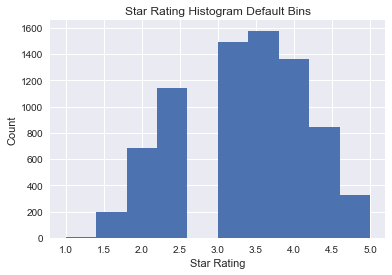

In [9]:
# Plotting Star Rating Histogram with Default Binning
_ = plt.hist(hhc.star_rating)
_ = plt.xlabel('Star Rating')
_ = plt.ylabel('Count')
_ = plt.title('Star Rating Histogram Default Bins')
plt.show()

Very interesting!  There appears to be no agencies rated between a 2.5 and a 3.  Furthermore, this histogram appears as though it might just be normally distributed.  I will run a CDF alongside the theoretical normal to confirm in my inferential statistical analysis of this data.

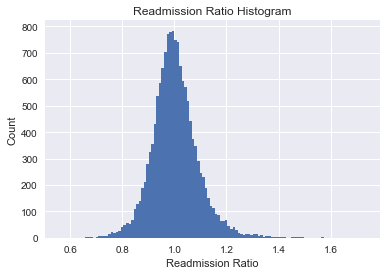

In [10]:
# Plotting Readmission Ratio Histogram
_ = plt.hist(readmit.readmission_ratio, bins=r_bins)
_ = plt.xlabel('Readmission Ratio')
_ = plt.ylabel('Count')
_ = plt.title('Readmission Ratio Histogram')
plt.show()

A lot more variability and yet another apparent normal distribution.  This will also be tested in my inferential stattistical analysis.  However, this is very exciting, and it is starting to look like my hypothesis that more observations were needed may be accurate. 

***
I was able to obtain additional expectation data for each home health care agency indicating how an agency met expectations for ER admissions and readmissions.  Before going comparing this data to other measures, I would like to create a couple bar charts to see the counts for each category, and how they compare to one another.

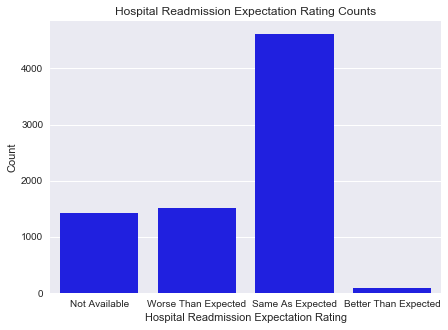

In [12]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'readmit_expectation', data=hhc, color = 'blue')
_ = plt.xlabel('Hospital Readmission Expectation Rating')
_ = plt.ylabel('Count')
_ = plt.title('Hospital Readmission Expectation Rating Counts')
ratings = ['Not Available', 'Worse Than Expected','Same As Expected','Better Than Expected']
plt.xticks(np.arange(4),ratings)

plt.show()

As we can see, the majority of home health care facilities rated as same as expected for hospital readmissions.<br>
It is surprising to see so few rating better than expected.

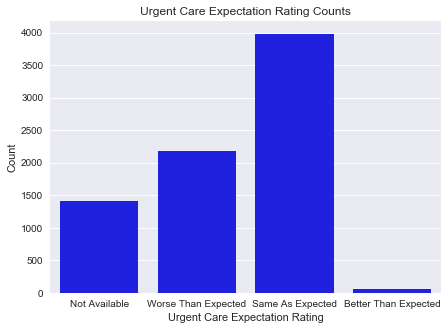

In [13]:
# Bar Chart of Readmission Expectations for HHC
plt.subplots(0,figsize=(7,5))
_ = sns.countplot(x = 'er_admit_expectation', data=hhc, color = 'blue')
_ = plt.xlabel('Urgent Care Expectation Rating')
_ = plt.ylabel('Count')
_ = plt.title('Urgent Care Expectation Rating Counts')
plt.xticks(np.arange(4),ratings)

plt.show()

Like the hospital readmission expectation ratings, the majority seem to be the same as expected, very few appear to be better than expected, and there is a larger amount of worse than expected as compared to hospital readmissions.

***
Each state now has multiple observations.  I would like to see how the states compare to one another by building a violin plot.

In [15]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
meltme1 = readmit.drop(['hospital_name','provider_number','predicted_rate','expected_rate'], axis=1)
melted_readmit = pd.melt(meltme1, id_vars='state')
melted_readmit.columns=('state','category','ratio')

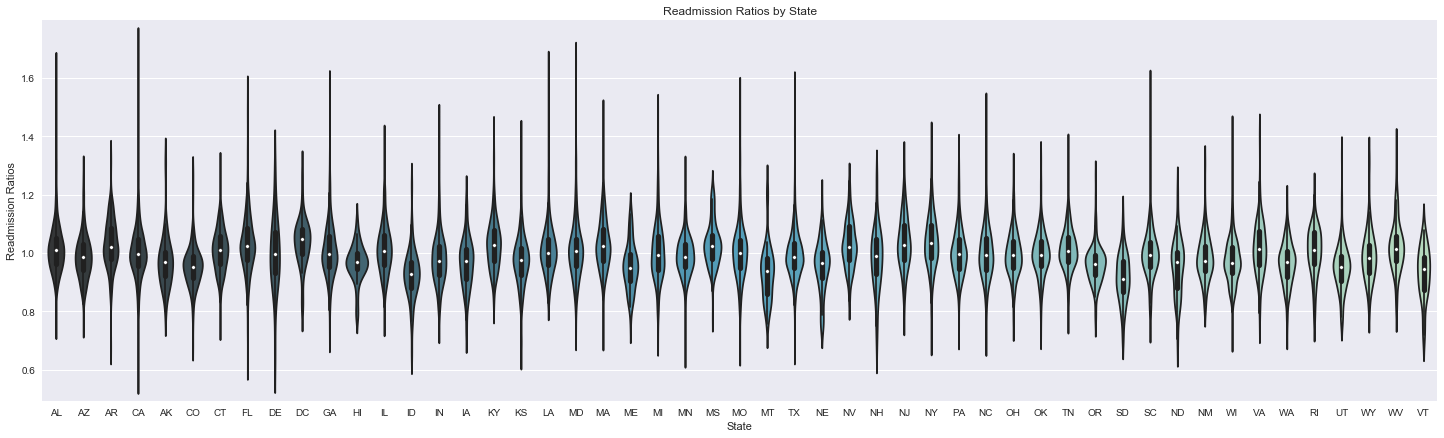

In [16]:
# Creating Violin Plot of States and their Readmission Ratios
plt.subplots(0,figsize=(25,7))
_= sns.violinplot(x='state', y='ratio', data=melted_readmit, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Readmission Ratios')
_ = plt.title('Readmission Ratios by State')
plt.margins(.02)
plt.show()


There is a lot of information to unpack here.  As expected, and observed in the grouped state data, most state mean ratios hover close to 1.0.  However, there is a lot of variability between states, with a few states having the majority of their readmission ratios below the excessive readmisison ratio indicator of 1.0.<br><br>
Ultimately, this graph unlocks a slew of questions we could ask.  For example:<br>
-   Does state population play a role in readmission ratio?<br>
-   What causes the variablility in state readmission ratios?<br>
-   What qualities do lower ratio states have different from higher ratio states? What do they have in common?

In [17]:
# Creating New Dataframe of Star Ratings and State by Melting Dataframe and Filtering Star Rating
melted_hhc = pd.melt(hhc, id_vars='state')
star_rate = melted_hhc[melted_hhc.variable =='star_rating']
star_rate.columns=('state','category','rating')
star_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7631 entries, 61048 to 68678
Data columns (total 3 columns):
state       7631 non-null object
category    7631 non-null object
rating      7631 non-null object
dtypes: object(3)
memory usage: 238.5+ KB


I initially had a problem creating the violin plot.  Come to find out the ratings were stored as an object and not a float.  So I coerced the data back into a float (with no data loss) and successfully plotted the violin plot.

In [18]:
dfa = star_rate['rating'].apply(pd.to_numeric, errors='coerce')
dfb = star_rate['state']
star_rate= pd.concat([dfb,dfa], axis=1)
star_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7631 entries, 61048 to 68678
Data columns (total 2 columns):
state     7631 non-null object
rating    7631 non-null float64
dtypes: float64(1), object(1)
memory usage: 178.9+ KB


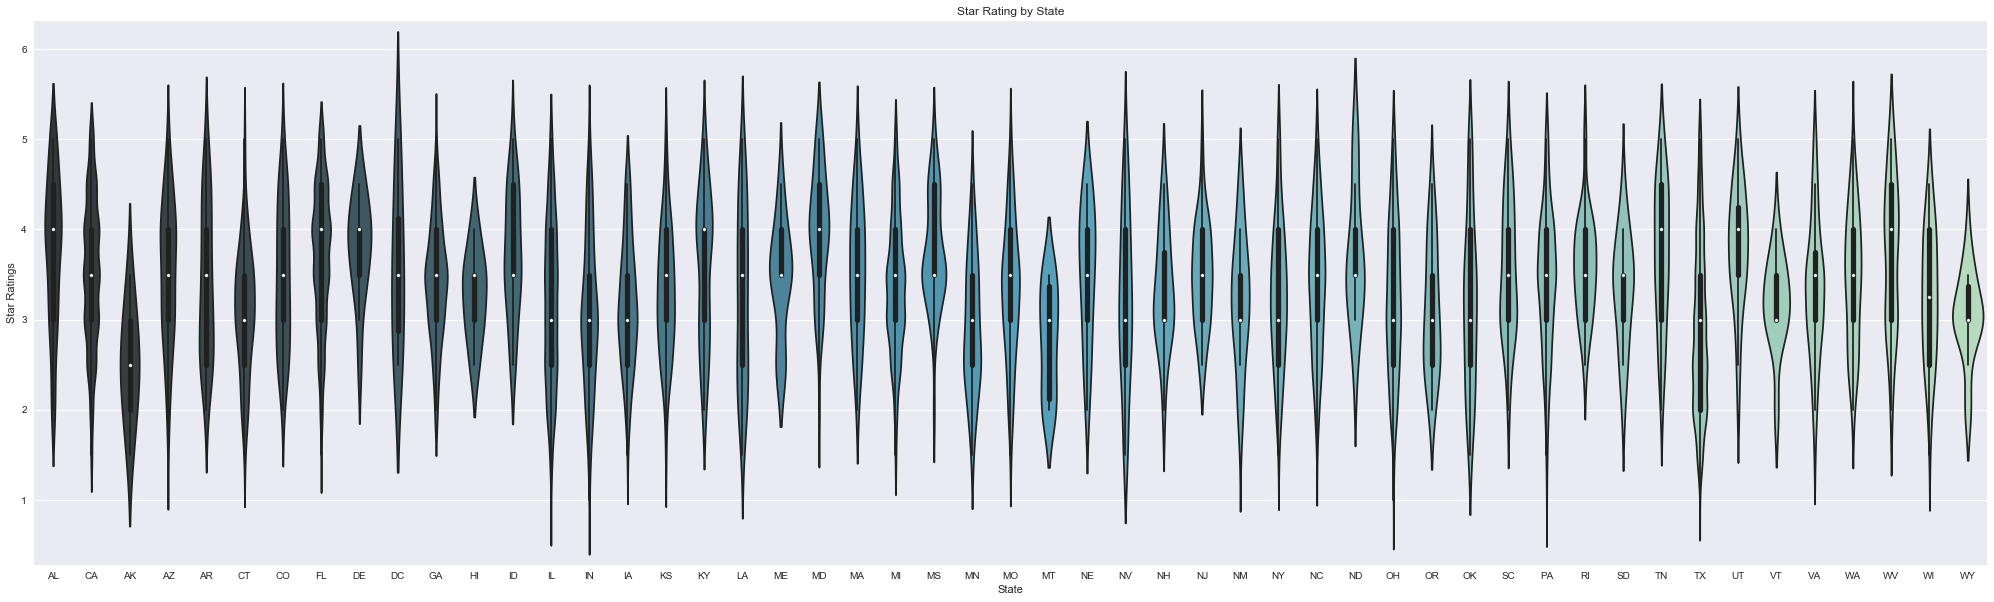

In [19]:
# Create Violin Plot of States and their Star Ratings
plt.subplots(0,figsize=(35,10))
_= sns.violinplot(x='state', y='rating', data=star_rate, palette='GnBu_d')
_ = plt.xlabel('State')
_ = plt.ylabel('Star Ratings')
_ = plt.title('Star Rating by State')
plt.margins(.02)
plt.show()


Another fascinating plot!  There appears to be a lot more variability within the states overall.  At first glance it appears as though we might find a relationship between readmission ratios and star ratings this time!<br><br>
Similar to our first violin plot, we have more questions to ask.  For example:<br>
-   What qualities contribute to a higher star rating?<br>
-   How does star rating effect excessive readmissions?<br>
-   What qualities do higher star rated states have differnt from lower star rated states?  What do they have in common?

While the violin plots generate some interesting questions, the client we are focusing on is a health care provider or a home health care provider.  As such, our strategy is to focus more on the question of how home health care be improved to assist in reducing hospital readmissions.

***
Similar to Part I, let's now take a look at the variablity of each measure by creating some box plots.

In [20]:
# Dropping Non-Rated Categories and Melting them into a New Dataframe.
categories = hhc.drop(['state', 'cms_number','name','nursing_care','physical_therapy','occupational_therapy','pathology_services',
                'medical_soc_services','home_health_aid', 'star_rating','readmit_expectation','er_admit_expectation'], axis=1)
hhc_melt = pd.melt(categories)
hhc_melt.columns=('category','rating')

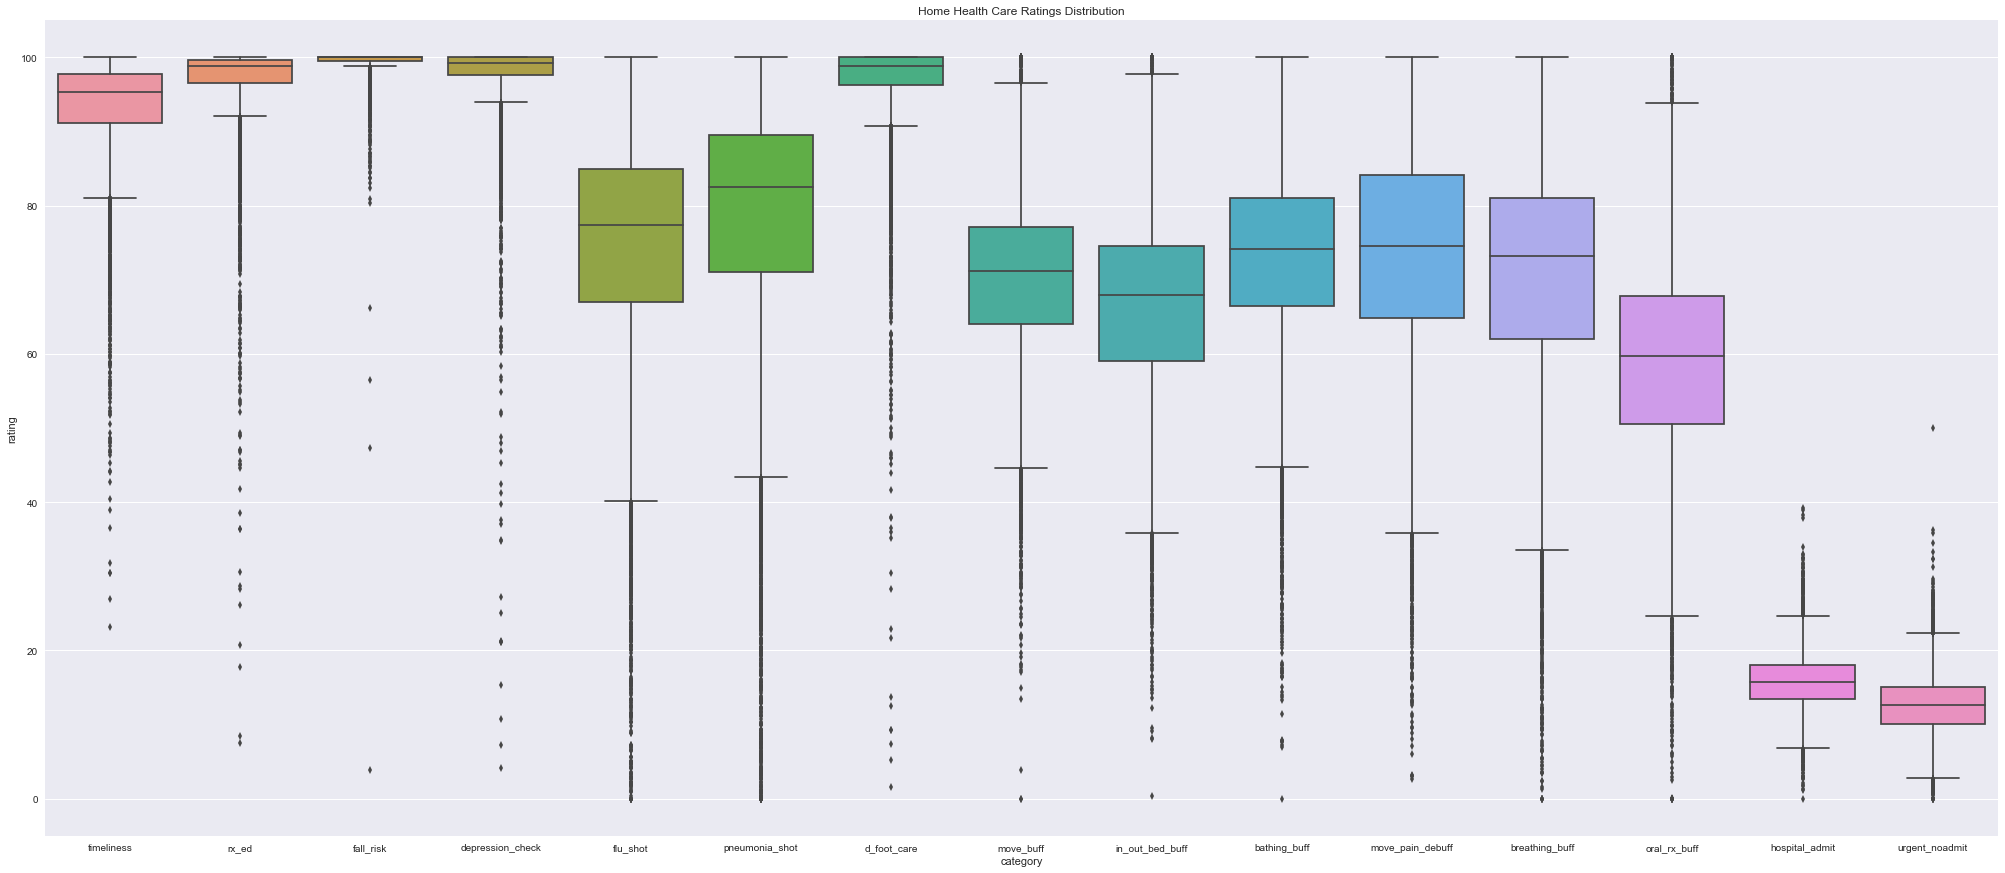

In [35]:
# Plot Box Plots for All Categories to Show Relative Variation
plt.subplots(0,figsize=(35,15))
_=sns.boxplot(x='category',y='rating',data=hhc_melt)
_= plt.title('Home Health Care Ratings Distribution')
plt.show()

As expected, these categories have a lot more variability than the previous model.  However, there appears to be a surprisingly high amount of outliers.  After reviewing the data, there are no footnotes advising that the outliers were calculated using a different metric.  As such, for the time being, I will assume these numbers accurately reflect the data in percentage points.

***
Let's take a look at the correlations within the data.  First we will need to permutate the hospital data and concatinate it to the home health care data in order to build a correlational heatmap.


In [36]:
# Set a Seed for Data Reproducibility
np.random.seed(42)

# Permutate Through the Data and Create and Array that is in Equal Length to the Home Health Care Data
readmit_ran = np.random.permutation(readmit.readmission_ratio)
readmit_sample = pd.DataFrame(readmit_ran[:len(hhc)])
readmit_sample.columns = ['readmission_ratio']
# Concatinate Data into HHC DataFrame
hhc_star = pd.concat([hhc,readmit_sample], axis = 1)

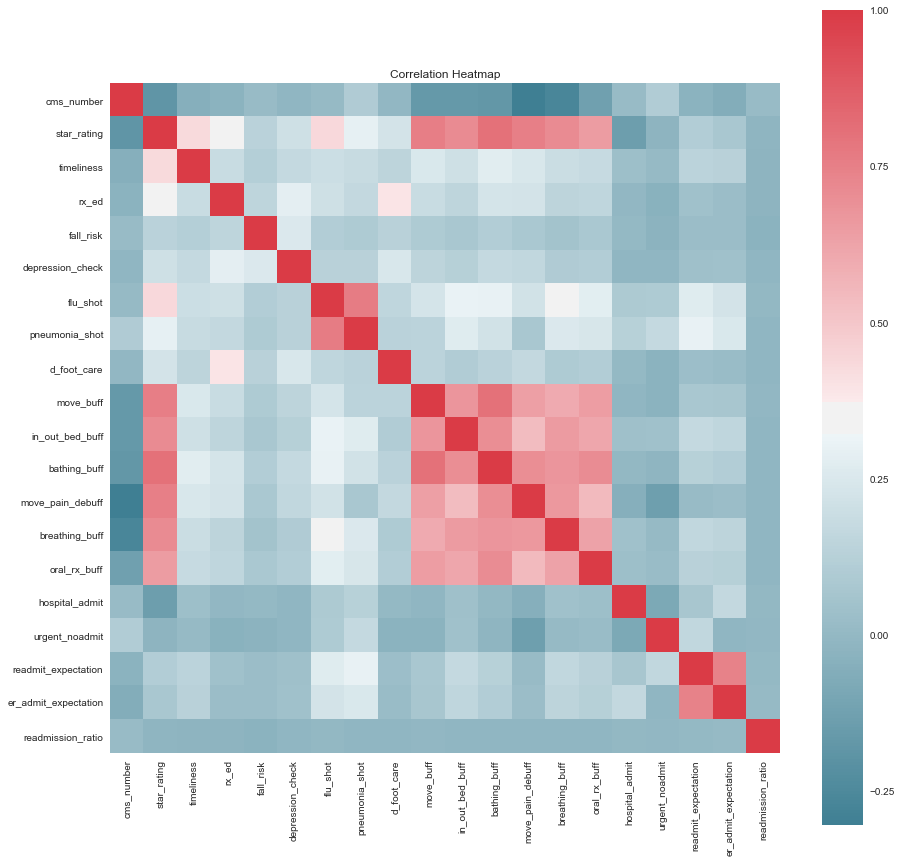

In [34]:
# Create Correlation Matrix to See Noteable Correlaitons
f, ax = plt.subplots(figsize=(15, 15))
corr = hhc_star.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation Heatmap')
plt.show()

Much to my initial surprise, there appears to be no correlations between what the surveys measured and hospital readmission ratios.<br>
I have a few hypotheses for why this is the case:<br>
-   One: The outliers in the data have hidden any existing relationships.
-   Two: Different scales were used within each individual measure of the HHC ratings by Agency data thus obscuring any existing relationships.
-   Three:  The data is correct and the HHC measures have no impact on hospital readmission ratios
-   Four:  Readmission Ratios are not attached to the survey data in any meaningful way.  This is due to both dataframes observing different health care providers.


My overall gut feeling is that hypothesis four is by far most probable.  While the data in the first EDA has fewer observations, it is more meaningful as the readmission ratios are directly attached to quality survey measures via state.  That being said, there is some great information here if a home health care company is seeking to increase it's star rating or is seeking improvements to client independence.<br>
Moreover, the data compiled here could prove useful when machine learning is applied.  As such, I will hold on to this data to see if it can be used later.  Otherwise, I will move forward with the data measured by state.